/var/folders/tq/02frqq2j1_s7qxry6j8l_2d80000gn/T/ipykernel_33876/2686238736.py:77: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Year', y='Profit (tỷ VND)', data=pbt_df, ax=ax2, palette=['#a9a9a9', '#40466e'])
/var/folders/tq/02frqq2j1_s7qxry6j8l_2d80000gn/T/ipykernel_33876/2686238736.py:111: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Year', y='Cost (%)', data=cc_df, ax=ax2, palette=['#a9a9a9', '#40466e'])
/var/folders/tq/02frqq2j1_s7qxry6j8l_2d80000gn/T/ipykernel_33876/2686238736.py:127: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplo

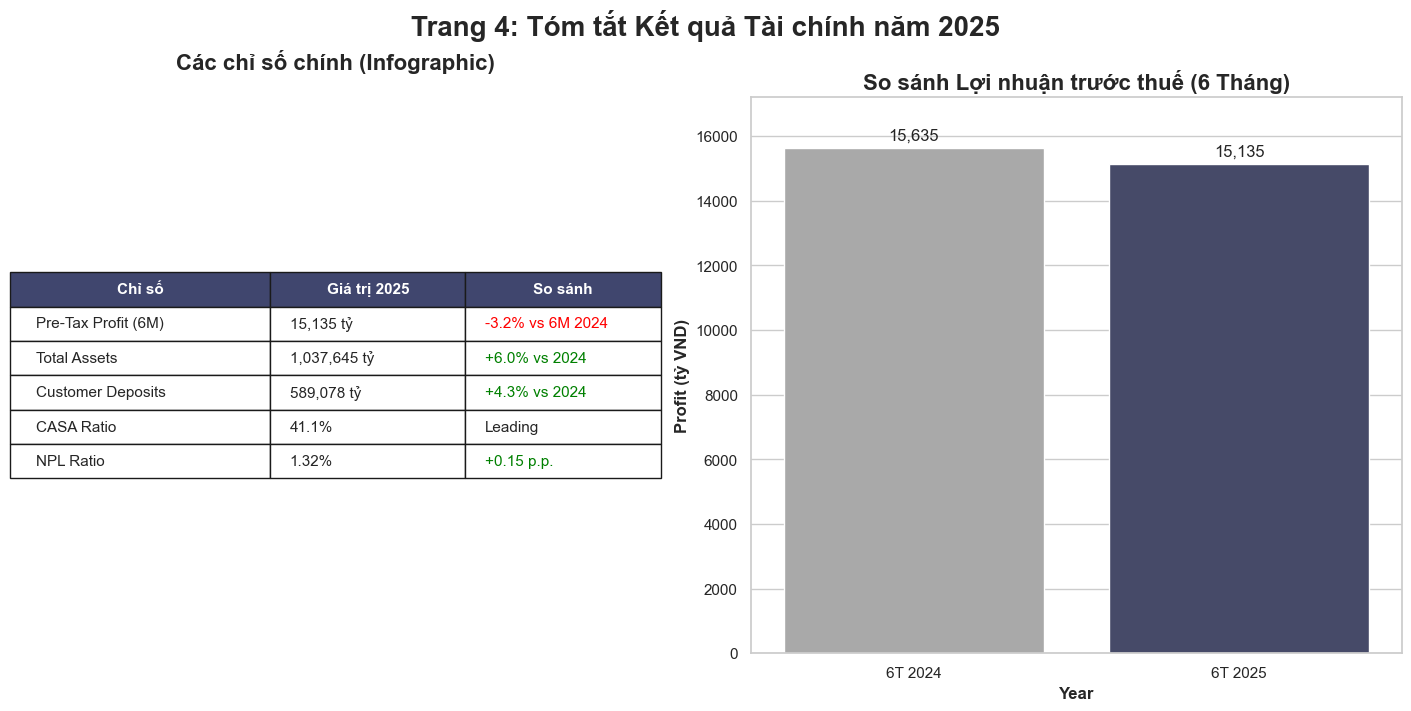

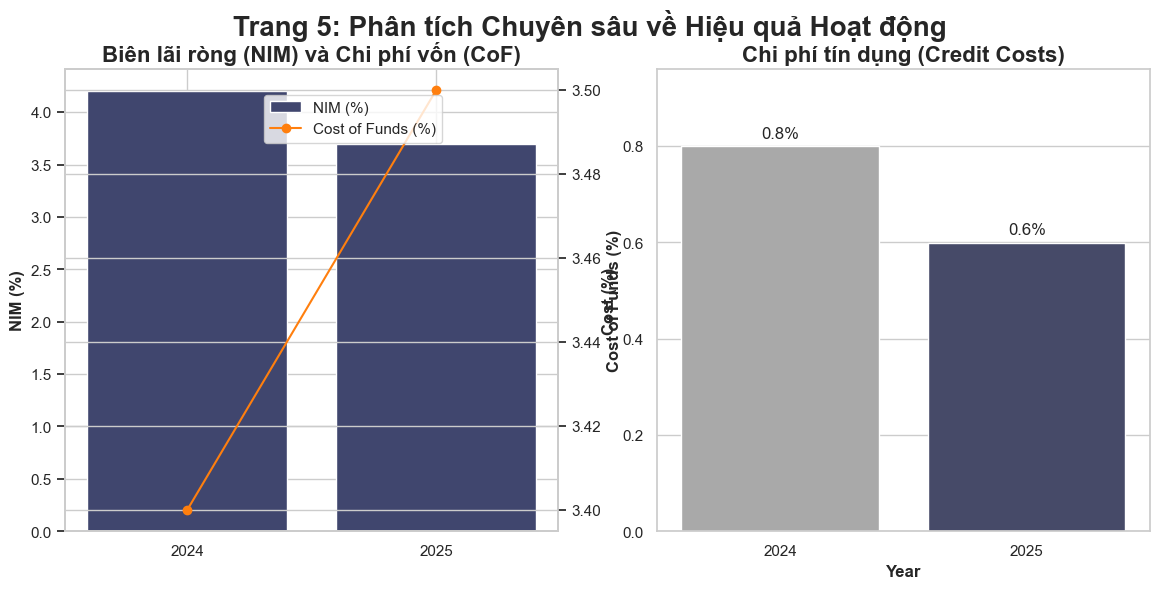

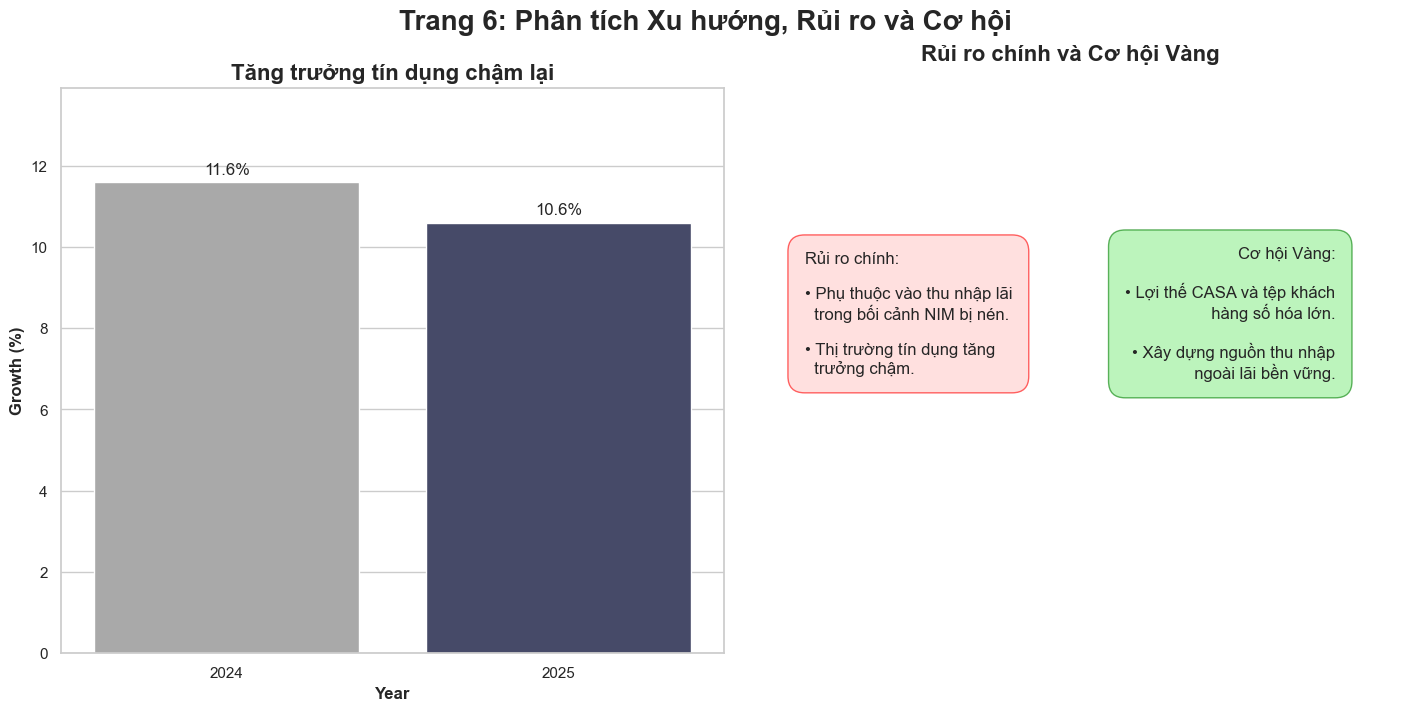

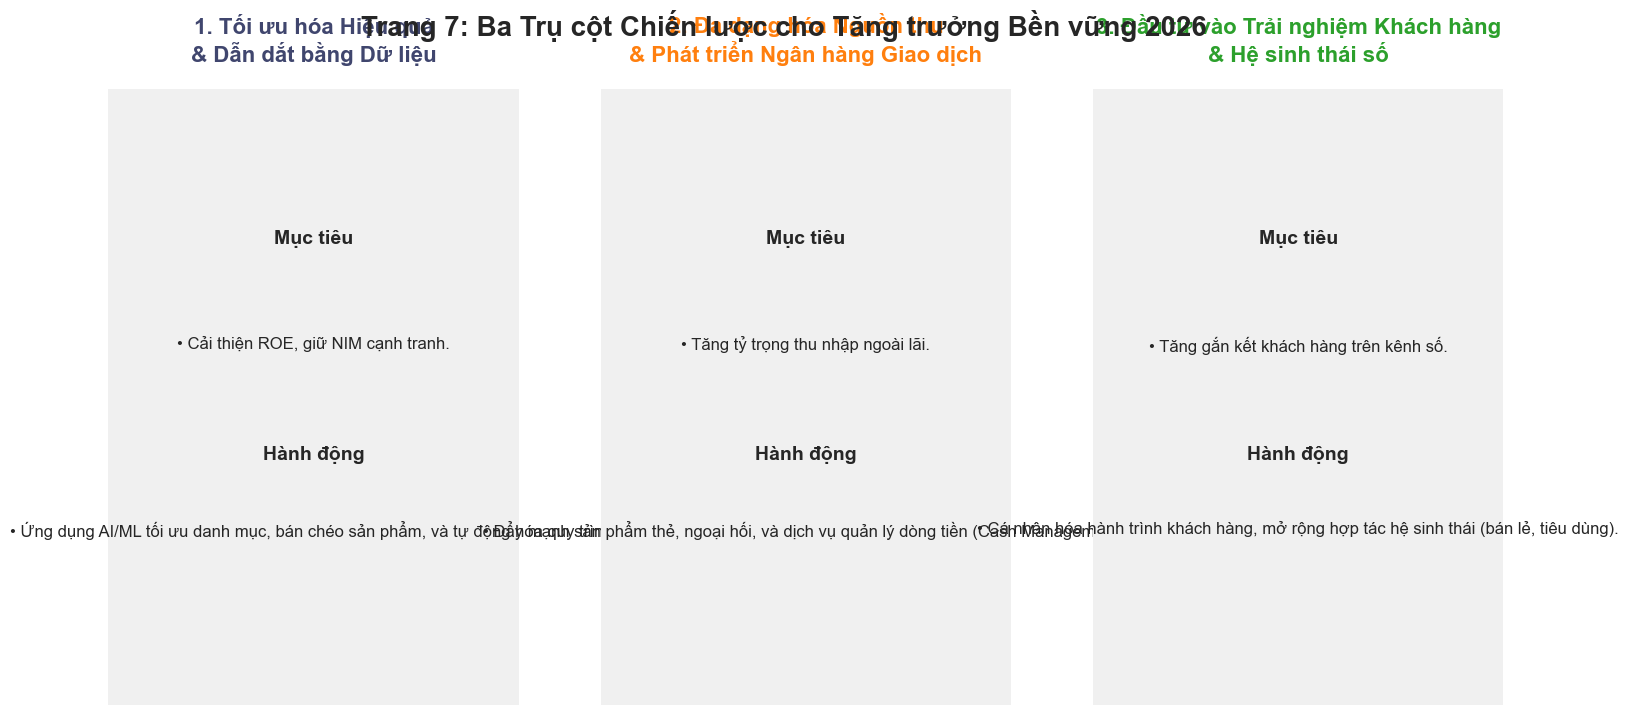

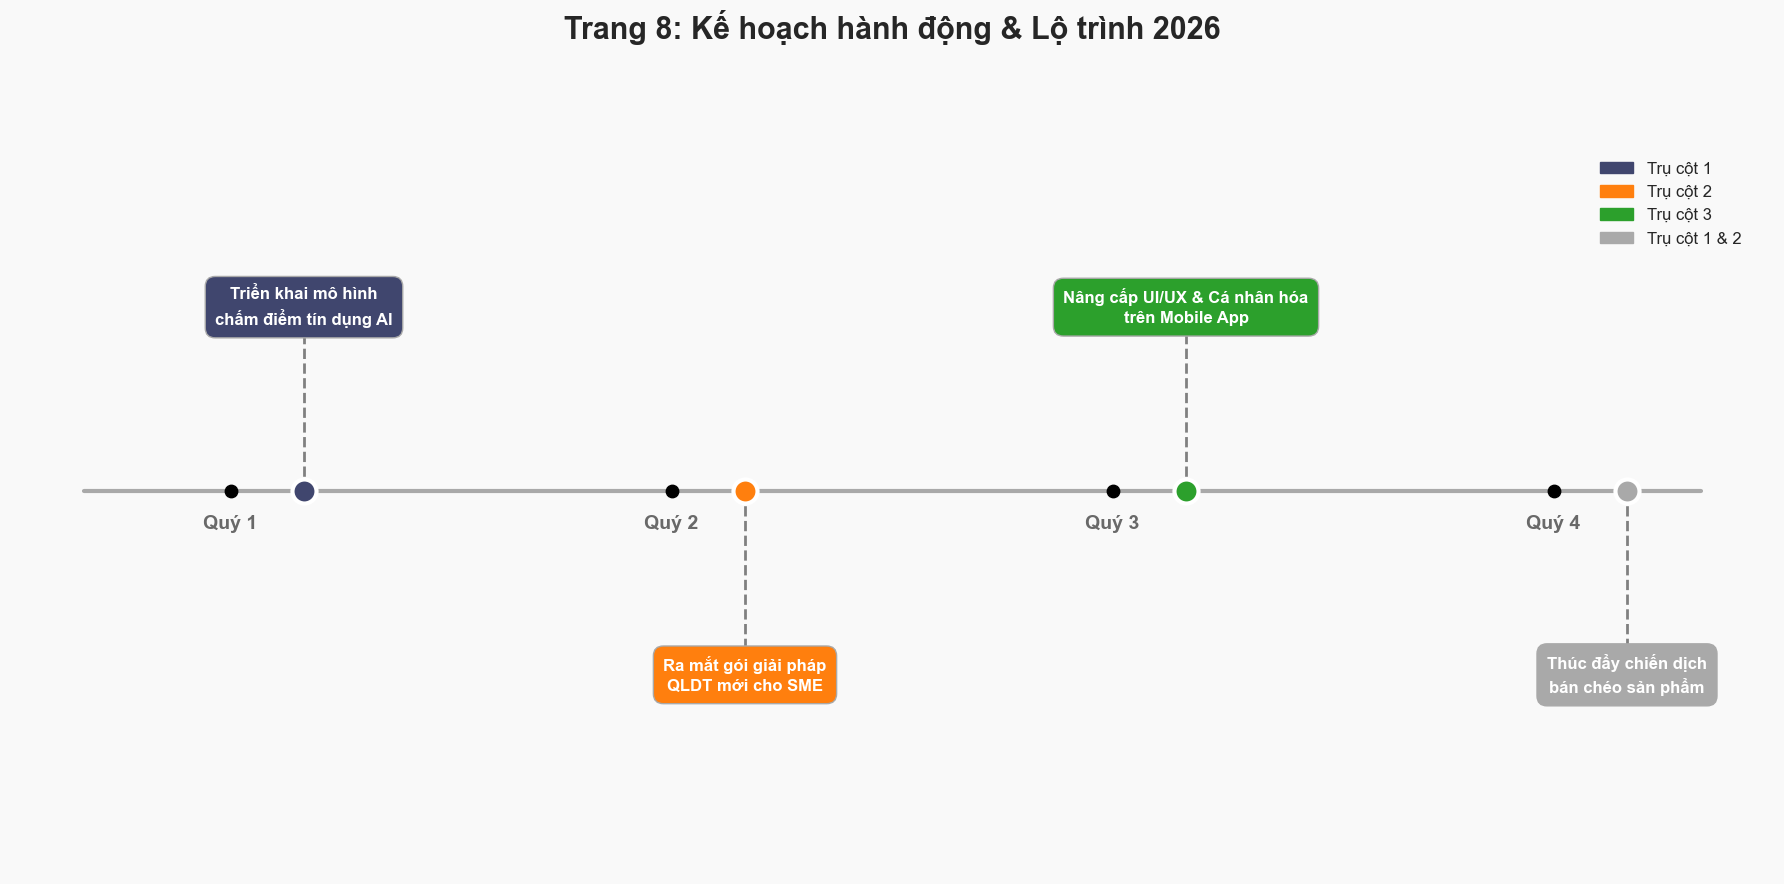

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Set a professional style for the plots
sns.set_theme(style="whitegrid")
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['figure.titleweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['figure.titlesize'] = 20

# --- Data Extraction from Report ---
# Data for Page 4
pbt_2025_6m = 15135
pbt_2024_6m = pbt_2025_6m / (1 - 0.032) # Calculate 2024 value from % change

financials_kpi = {
    'Metric': ['Pre-Tax Profit (6M)', 'Total Assets', 'Customer Deposits', 'CASA Ratio', 'NPL Ratio'],
    'Value': [f'{pbt_2025_6m:,.0f} tỷ', '1,037,645 tỷ', '589,078 tỷ', '41.1%', '1.32%'],
    'Change': ['-3.2% vs 6M 2024', '+6.0% vs 2024', '+4.3% vs 2024', 'Leading', '+0.15 p.p.']
}

# Data for Page 5
nim_2024 = 4.2
nim_2025 = 3.7
cost_of_funds_2024 = 3.4 # Assumed for visualization
cost_of_funds_2025 = 3.5
credit_costs_2024 = 0.8
credit_costs_2025 = 0.6

# Data for Page 6
credit_growth_2024 = 11.6
credit_growth_2025 = 10.6

# --- Visualization Functions ---

def visualize_page_4():
    """Generates visualizations for Page 4: Financial Summary."""
    fig = plt.figure(figsize=(14, 7), constrained_layout=True)
    fig.suptitle('Trang 4: Tóm tắt Kết quả Tài chính năm 2025')
    
    # KPI Table
    ax1 = fig.add_subplot(1, 2, 1)
    ax1.axis('off')
    ax1.set_title('Các chỉ số chính (Infographic)', pad=20)
    
    table_data = list(zip(financials_kpi['Metric'], financials_kpi['Value'], financials_kpi['Change']))
    table = ax1.table(cellText=table_data,
                      colLabels=['Chỉ số', 'Giá trị 2025', 'So sánh'],
                      cellLoc='left', loc='center',
                      colWidths=[0.4, 0.3, 0.3])
    table.auto_set_font_size(False)
    table.set_fontsize(11)
    table.scale(1, 2)
    
    for (row, col), cell in table.get_celld().items():
        if row == 0:
            cell.set_text_props(weight='bold', color='white')
            cell.set_facecolor('#40466e')
        else:
            cell.set_facecolor('white')
            if col == 2 and table_data[row-1][2].startswith('-'):
                 cell.get_text().set_color('red')
            elif col == 2 and table_data[row-1][2].startswith('+'):
                 cell.get_text().set_color('green')


    # Bar chart for Pre-Tax Profit
    ax2 = fig.add_subplot(1, 2, 2)
    pbt_data = {'Year': ['6T 2024', '6T 2025'], 'Profit (tỷ VND)': [pbt_2024_6m, pbt_2025_6m]}
    pbt_df = pd.DataFrame(pbt_data)
    
    sns.barplot(x='Year', y='Profit (tỷ VND)', data=pbt_df, ax=ax2, palette=['#a9a9a9', '#40466e'])
    ax2.set_title('So sánh Lợi nhuận trước thuế (6 Tháng)')
    for p in ax2.patches:
        ax2.annotate(f'{p.get_height():,.0f}', 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='center', 
                     xytext=(0, 9), 
                     textcoords='offset points')
    ax2.set_ylim(0, pbt_df['Profit (tỷ VND)'].max() * 1.1)


def visualize_page_5():
    """Generates visualizations for Page 5: Operational Performance."""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
    fig.suptitle('Trang 5: Phân tích Chuyên sâu về Hiệu quả Hoạt động')

    # Dual-axis chart for NIM and Cost of Funds
    years = ['2024', '2025']
    nim = [nim_2024, nim_2025]
    cof = [cost_of_funds_2024, cost_of_funds_2025]
    
    ax1.set_title('Biên lãi ròng (NIM) và Chi phí vốn (CoF)')
    ax1_twin = ax1.twinx()
    
    ax1.bar(years, nim, color='#40466e', label='NIM (%)')
    ax1_twin.plot(years, cof, color='#ff7f0e', marker='o', label='Cost of Funds (%)')
    
    ax1.set_ylabel('NIM (%)')
    ax1_twin.set_ylabel('Cost of Funds (%)')
    fig.legend(loc='upper right', bbox_to_anchor=(0.4, 0.85))

    # Bar chart for Credit Costs
    cc_data = {'Year': ['2024', '2025'], 'Cost (%)': [credit_costs_2024, credit_costs_2025]}
    cc_df = pd.DataFrame(cc_data)
    sns.barplot(x='Year', y='Cost (%)', data=cc_df, ax=ax2, palette=['#a9a9a9', '#40466e'])
    ax2.set_title('Chi phí tín dụng (Credit Costs)')
    for p in ax2.patches:
        ax2.annotate(f'{p.get_height()}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 9), textcoords='offset points')
    ax2.set_ylim(0, cc_df['Cost (%)'].max() * 1.2)


def visualize_page_6():
    """Generates visualizations for Page 6: Trends, Risks, and Opportunities."""
    fig = plt.figure(figsize=(14, 7), constrained_layout=True)
    fig.suptitle('Trang 6: Phân tích Xu hướng, Rủi ro và Cơ hội')

    # Credit Growth Bar Chart
    ax1 = fig.add_subplot(1, 2, 1)
    cg_data = {'Year': ['2024', '2025'], 'Growth (%)': [credit_growth_2024, credit_growth_2025]}
    cg_df = pd.DataFrame(cg_data)
    sns.barplot(x='Year', y='Growth (%)', data=cg_df, ax=ax1, palette=['#a9a9a9', '#40466e'])
    ax1.set_title('Tăng trưởng tín dụng chậm lại')
    for p in ax1.patches:
        ax1.annotate(f'{p.get_height()}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 9), textcoords='offset points')
    ax1.set_ylim(0, cg_df['Growth (%)'].max() * 1.2)

    # Risks vs Opportunities
    ax2 = fig.add_subplot(1, 2, 2)
    ax2.axis('off')
    ax2.set_title('Rủi ro chính và Cơ hội Vàng', pad=20)
    
    text_risks = "Rủi ro chính:\n\n• Phụ thuộc vào thu nhập lãi\n  trong bối cảnh NIM bị nén.\n\n• Thị trường tín dụng tăng\n  trưởng chậm."
    text_opps = "Cơ hội Vàng:\n\n• Lợi thế CASA và tệp khách\n  hàng số hóa lớn.\n\n• Xây dựng nguồn thu nhập\n  ngoài lãi bền vững."
    
    ax2.text(0.1, 0.6, text_risks, fontsize=12, va='center', ha='left', bbox=dict(boxstyle='round,pad=1', fc='#ffcccb', ec='red', alpha=0.6))
    ax2.text(0.9, 0.6, text_opps, fontsize=12, va='center', ha='right', bbox=dict(boxstyle='round,pad=1', fc='#90ee90', ec='green', alpha=0.6))


def visualize_page_7():
    """Generates an improved visualization for Page 7: Strategic Pillars."""
    fig, axes = plt.subplots(1, 3, figsize=(18, 8), sharey=True)
    fig.suptitle('Trang 7: Ba Trụ cột Chiến lược cho Tăng trưởng Bền vững 2026', fontsize=20, weight='bold')

    pillars = {
        "1. Tối ưu hóa Hiệu quả\n& Dẫn dắt bằng Dữ liệu": {
            "Mục tiêu": "• Cải thiện ROE, giữ NIM cạnh tranh.",
            "Hành động": "• Ứng dụng AI/ML tối ưu danh mục, bán chéo sản phẩm, và tự động hóa quy trình.",
            "color": "#40466e"
        },
        "2. Đa dạng hóa Nguồn thu\n& Phát triển Ngân hàng Giao dịch": {
            "Mục tiêu": "• Tăng tỷ trọng thu nhập ngoài lãi.",
            "Hành động": "• Đẩy mạnh sản phẩm thẻ, ngoại hối, và dịch vụ quản lý dòng tiền (Cash Management).",
            "color": "#ff7f0e"
        },
        "3. Đầu tư vào Trải nghiệm Khách hàng\n& Hệ sinh thái số": {
            "Mục tiêu": "• Tăng gắn kết khách hàng trên kênh số.",
            "Hành động": "• Cá nhân hóa hành trình khách hàng, mở rộng hợp tác hệ sinh thái (bán lẻ, tiêu dùng).",
            "color": "#2ca02c"
        }
    }
    
    for i, (title, content) in enumerate(pillars.items()):
        ax = axes[i]
        ax.set_xticks([])
        ax.set_yticks([])
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.spines['left'].set_visible(False)
        ax.set_facecolor('#f0f0f0')

        ax.set_title(title, fontsize=16, weight='bold', pad=20, color=content['color'])

        ax.text(0.5, 0.75, "Mục tiêu", transform=ax.transAxes, ha='center', fontsize=14, weight='bold')
        ax.text(0.5, 0.6, content['Mục tiêu'], transform=ax.transAxes, ha='center', va='top', fontsize=12, wrap=True)

        ax.text(0.5, 0.4, "Hành động", transform=ax.transAxes, ha='center', fontsize=14, weight='bold')
        ax.text(0.5, 0.3, content['Hành động'], transform=ax.transAxes, ha='center', va='top', fontsize=12, wrap=True)


def visualize_page_8():
    """Generates an improved timeline/roadmap visualization for Page 8."""
    fig, ax = plt.subplots(figsize=(18, 9))
    fig.suptitle('Trang 8: Kế hoạch hành động & Lộ trình 2026', fontsize=22, weight='bold', y=0.98)

    # --- Configuration ---
    ax.set_ylim(-2.5, 2.5)
    ax.set_xlim(0, 12)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.set_facecolor("#f9f9f9")
    fig.set_facecolor("#f9f9f9")


    # --- Timeline Axis ---
    ax.plot([0.5, 11.5], [0, 0], color='darkgrey', linewidth=3, zorder=1)
    
    # Add quarter markers and labels
    quarter_markers = {
        'Quý 1': 1.5, 'Quý 2': 4.5, 'Quý 3': 7.5, 'Quý 4': 10.5
    }
    for label, marker in quarter_markers.items():
        ax.scatter(marker, 0, s=80, color='black', zorder=2)
        ax.text(marker, -0.25, label, ha='center', fontsize=14, weight='bold', color='dimgrey')

    # --- Roadmap Items ---
    tasks = {
        # Quý 1-2
        "Triển khai mô hình\nchấm điểm tín dụng AI": (2, 1.2, "P1"),
        "Ra mắt gói giải pháp\nQLDT mới cho SME": (5, -1.2, "P2"),
        # Quý 3-4
        "Nâng cấp UI/UX & Cá nhân hóa\ntrên Mobile App": (8, 1.2, "P3"),
        "Thúc đẩy chiến dịch\nbán chéo sản phẩm": (11, -1.2, "P1 & P2")
    }

    pillar_colors = {"P1": "#40466e", "P2": "#ff7f0e", "P3": "#2ca02c", "P1 & P2": "#a9a9a9"}

    for task, (pos, level, pillar) in tasks.items():
        # Stem
        ax.plot([pos, pos], [0, level * 0.9], color='grey', linestyle='--', linewidth=2)
        
        # Marker
        ax.scatter(pos, 0, s=300, color=pillar_colors[pillar], zorder=3, ec='white', lw=3)
        
        # Text box
        ax.text(pos, level, task, ha='center', va=('center'), 
                fontsize=12,
                bbox=dict(boxstyle='round,pad=0.6', fc=pillar_colors[pillar], ec='darkgrey', alpha=1),
                color='white', weight='bold', linespacing=1.4)
    
    # --- Legend ---
    legend_patches = [plt.Rectangle((0,0),1,1, color=color) for color in pillar_colors.values()]
    legend_labels = ["Trụ cột 1", "Trụ cột 2", "Trụ cột 3", "Trụ cột 1 & 2"]
    ax.legend(legend_patches, legend_labels, loc='upper right', fontsize=12, frameon=False, bbox_to_anchor=(0.99, 0.95))
    
    plt.tight_layout(rect=[0, 0, 1, 0.95])


# --- Main Execution ---
if __name__ == '__main__':
    visualize_page_4()
    visualize_page_5()
    visualize_page_6()
    visualize_page_7()
    visualize_page_8()

    plt.show()


/var/folders/tq/02frqq2j1_s7qxry6j8l_2d80000gn/T/ipykernel_33876/2850218427.py:77: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Year', y='Profit (tỷ VND)', data=pbt_df, ax=ax2, palette=['#a9a9a9', '#40466e'])
/var/folders/tq/02frqq2j1_s7qxry6j8l_2d80000gn/T/ipykernel_33876/2850218427.py:111: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Year', y='Cost (%)', data=cc_df, ax=ax2, palette=['#a9a9a9', '#40466e'])
/var/folders/tq/02frqq2j1_s7qxry6j8l_2d80000gn/T/ipykernel_33876/2850218427.py:127: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplo

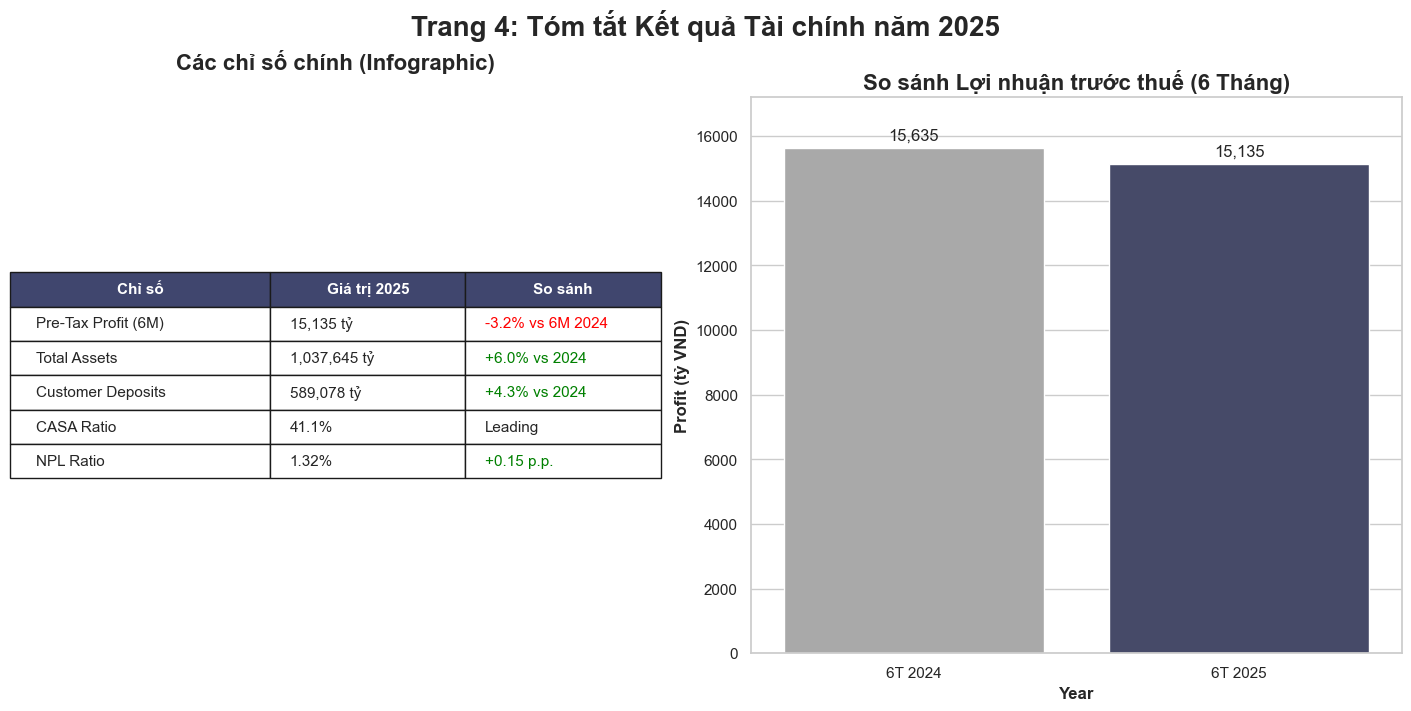

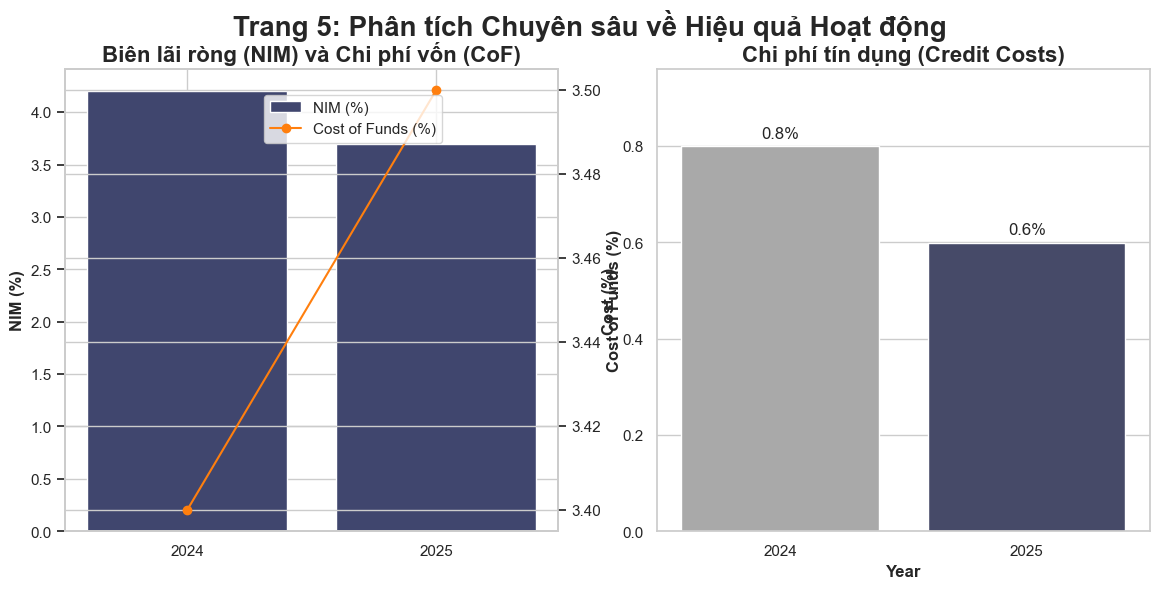

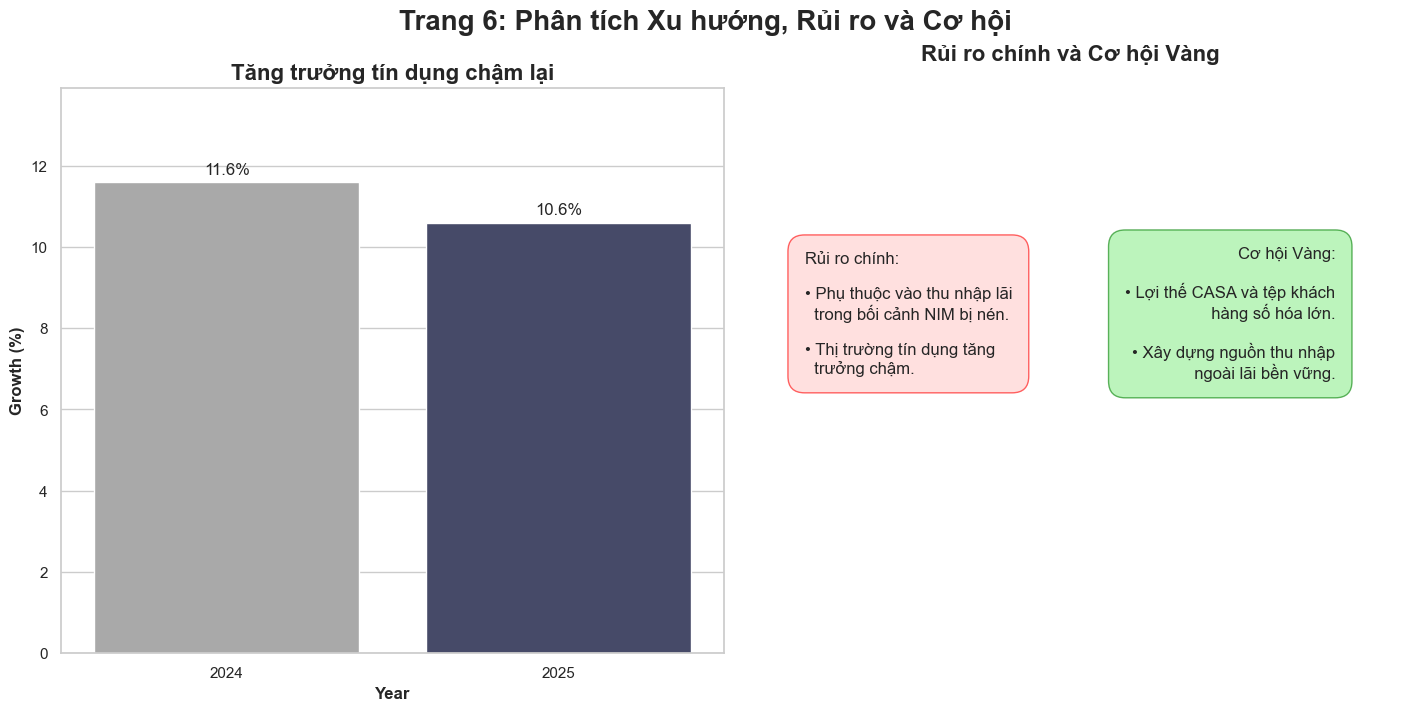

/Users/165lhyp/miniconda3/envs/battery_rul/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/165lhyp/miniconda3/envs/battery_rul/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128101 (\N{BUSTS IN SILHOUETTE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/165lhyp/miniconda3/envs/battery_rul/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128188 (\N{BRIEFCASE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


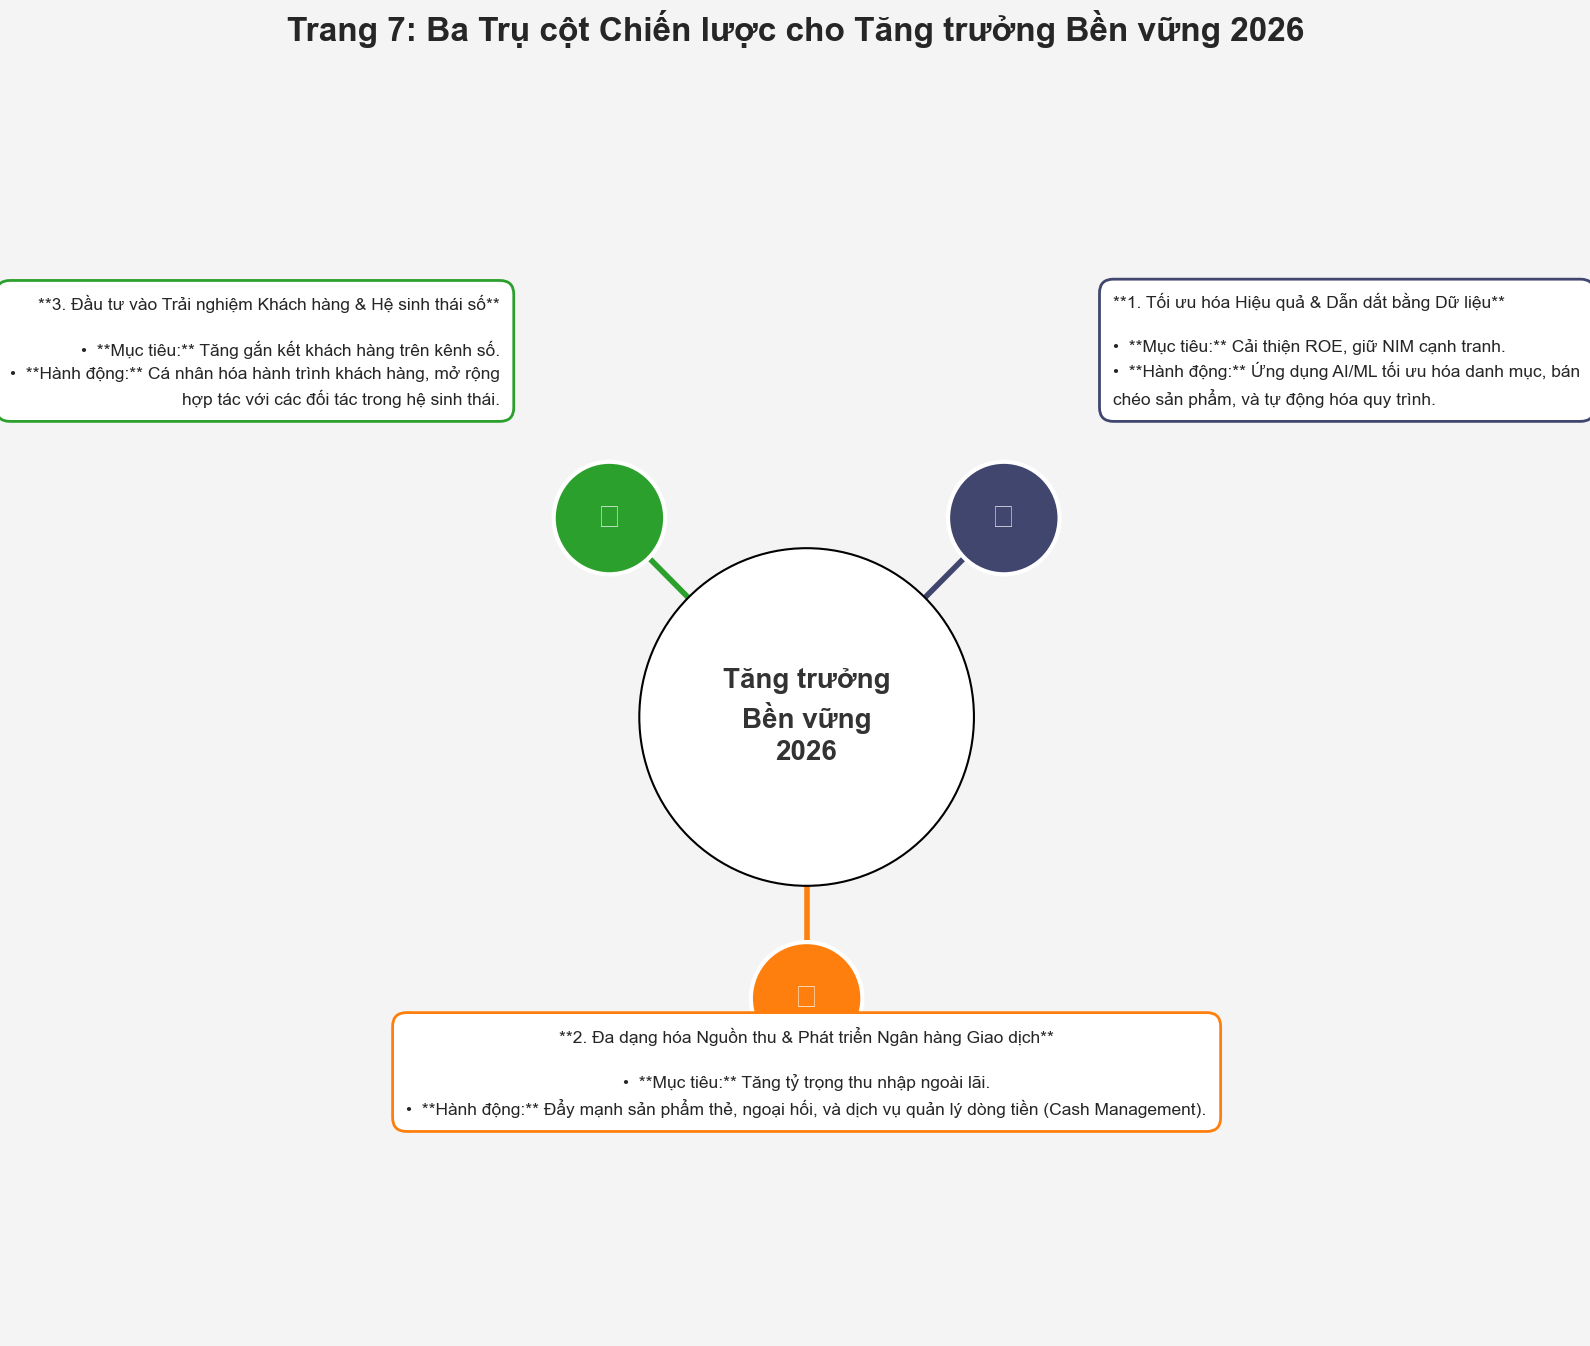

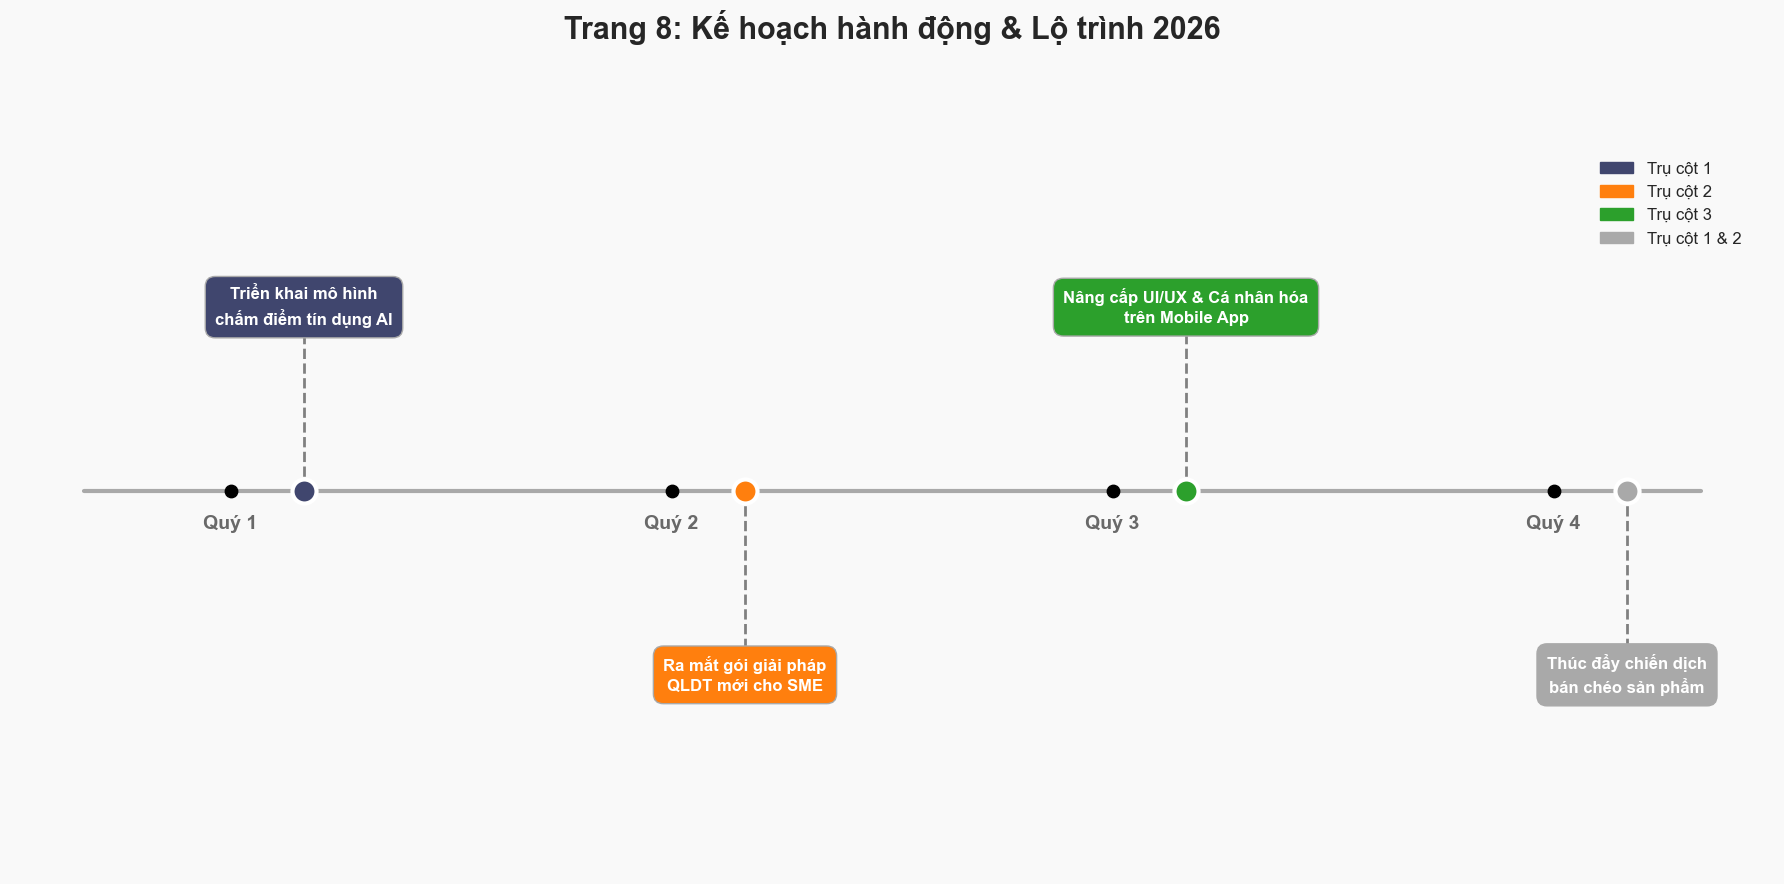

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Set a professional style for the plots
sns.set_theme(style="whitegrid")
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['figure.titleweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['figure.titlesize'] = 20

# --- Data Extraction from Report ---
# Data for Page 4
pbt_2025_6m = 15135
pbt_2024_6m = pbt_2025_6m / (1 - 0.032) # Calculate 2024 value from % change

financials_kpi = {
    'Metric': ['Pre-Tax Profit (6M)', 'Total Assets', 'Customer Deposits', 'CASA Ratio', 'NPL Ratio'],
    'Value': [f'{pbt_2025_6m:,.0f} tỷ', '1,037,645 tỷ', '589,078 tỷ', '41.1%', '1.32%'],
    'Change': ['-3.2% vs 6M 2024', '+6.0% vs 2024', '+4.3% vs 2024', 'Leading', '+0.15 p.p.']
}

# Data for Page 5
nim_2024 = 4.2
nim_2025 = 3.7
cost_of_funds_2024 = 3.4 # Assumed for visualization
cost_of_funds_2025 = 3.5
credit_costs_2024 = 0.8
credit_costs_2025 = 0.6

# Data for Page 6
credit_growth_2024 = 11.6
credit_growth_2025 = 10.6

# --- Visualization Functions ---

def visualize_page_4():
    """Generates visualizations for Page 4: Financial Summary."""
    fig = plt.figure(figsize=(14, 7), constrained_layout=True)
    fig.suptitle('Trang 4: Tóm tắt Kết quả Tài chính năm 2025')
    
    # KPI Table
    ax1 = fig.add_subplot(1, 2, 1)
    ax1.axis('off')
    ax1.set_title('Các chỉ số chính (Infographic)', pad=20)
    
    table_data = list(zip(financials_kpi['Metric'], financials_kpi['Value'], financials_kpi['Change']))
    table = ax1.table(cellText=table_data,
                      colLabels=['Chỉ số', 'Giá trị 2025', 'So sánh'],
                      cellLoc='left', loc='center',
                      colWidths=[0.4, 0.3, 0.3])
    table.auto_set_font_size(False)
    table.set_fontsize(11)
    table.scale(1, 2)
    
    for (row, col), cell in table.get_celld().items():
        if row == 0:
            cell.set_text_props(weight='bold', color='white')
            cell.set_facecolor('#40466e')
        else:
            cell.set_facecolor('white')
            if col == 2 and table_data[row-1][2].startswith('-'):
                 cell.get_text().set_color('red')
            elif col == 2 and table_data[row-1][2].startswith('+'):
                 cell.get_text().set_color('green')


    # Bar chart for Pre-Tax Profit
    ax2 = fig.add_subplot(1, 2, 2)
    pbt_data = {'Year': ['6T 2024', '6T 2025'], 'Profit (tỷ VND)': [pbt_2024_6m, pbt_2025_6m]}
    pbt_df = pd.DataFrame(pbt_data)
    
    sns.barplot(x='Year', y='Profit (tỷ VND)', data=pbt_df, ax=ax2, palette=['#a9a9a9', '#40466e'])
    ax2.set_title('So sánh Lợi nhuận trước thuế (6 Tháng)')
    for p in ax2.patches:
        ax2.annotate(f'{p.get_height():,.0f}', 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='center', 
                     xytext=(0, 9), 
                     textcoords='offset points')
    ax2.set_ylim(0, pbt_df['Profit (tỷ VND)'].max() * 1.1)


def visualize_page_5():
    """Generates visualizations for Page 5: Operational Performance."""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
    fig.suptitle('Trang 5: Phân tích Chuyên sâu về Hiệu quả Hoạt động')

    # Dual-axis chart for NIM and Cost of Funds
    years = ['2024', '2025']
    nim = [nim_2024, nim_2025]
    cof = [cost_of_funds_2024, cost_of_funds_2025]
    
    ax1.set_title('Biên lãi ròng (NIM) và Chi phí vốn (CoF)')
    ax1_twin = ax1.twinx()
    
    ax1.bar(years, nim, color='#40466e', label='NIM (%)')
    ax1_twin.plot(years, cof, color='#ff7f0e', marker='o', label='Cost of Funds (%)')
    
    ax1.set_ylabel('NIM (%)')
    ax1_twin.set_ylabel('Cost of Funds (%)')
    fig.legend(loc='upper right', bbox_to_anchor=(0.4, 0.85))

    # Bar chart for Credit Costs
    cc_data = {'Year': ['2024', '2025'], 'Cost (%)': [credit_costs_2024, credit_costs_2025]}
    cc_df = pd.DataFrame(cc_data)
    sns.barplot(x='Year', y='Cost (%)', data=cc_df, ax=ax2, palette=['#a9a9a9', '#40466e'])
    ax2.set_title('Chi phí tín dụng (Credit Costs)')
    for p in ax2.patches:
        ax2.annotate(f'{p.get_height()}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 9), textcoords='offset points')
    ax2.set_ylim(0, cc_df['Cost (%)'].max() * 1.2)


def visualize_page_6():
    """Generates visualizations for Page 6: Trends, Risks, and Opportunities."""
    fig = plt.figure(figsize=(14, 7), constrained_layout=True)
    fig.suptitle('Trang 6: Phân tích Xu hướng, Rủi ro và Cơ hội')

    # Credit Growth Bar Chart
    ax1 = fig.add_subplot(1, 2, 1)
    cg_data = {'Year': ['2024', '2025'], 'Growth (%)': [credit_growth_2024, credit_growth_2025]}
    cg_df = pd.DataFrame(cg_data)
    sns.barplot(x='Year', y='Growth (%)', data=cg_df, ax=ax1, palette=['#a9a9a9', '#40466e'])
    ax1.set_title('Tăng trưởng tín dụng chậm lại')
    for p in ax1.patches:
        ax1.annotate(f'{p.get_height()}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 9), textcoords='offset points')
    ax1.set_ylim(0, cg_df['Growth (%)'].max() * 1.2)

    # Risks vs Opportunities
    ax2 = fig.add_subplot(1, 2, 2)
    ax2.axis('off')
    ax2.set_title('Rủi ro chính và Cơ hội Vàng', pad=20)
    
    text_risks = "Rủi ro chính:\n\n• Phụ thuộc vào thu nhập lãi\n  trong bối cảnh NIM bị nén.\n\n• Thị trường tín dụng tăng\n  trưởng chậm."
    text_opps = "Cơ hội Vàng:\n\n• Lợi thế CASA và tệp khách\n  hàng số hóa lớn.\n\n• Xây dựng nguồn thu nhập\n  ngoài lãi bền vững."
    
    ax2.text(0.1, 0.6, text_risks, fontsize=12, va='center', ha='left', bbox=dict(boxstyle='round,pad=1', fc='#ffcccb', ec='red', alpha=0.6))
    ax2.text(0.9, 0.6, text_opps, fontsize=12, va='center', ha='right', bbox=dict(boxstyle='round,pad=1', fc='#90ee90', ec='green', alpha=0.6))


def visualize_page_7():
    """Generates a 'hub and spoke' circular infographic for Page 7 strategy."""
    fig, ax = plt.subplots(figsize=(16, 14))
    fig.suptitle('Trang 7: Ba Trụ cột Chiến lược cho Tăng trưởng Bền vững 2026', fontsize=24, weight='bold', y=0.96)

    # --- Base Setup ---
    ax.set_xlim(-2.2, 2.2)
    ax.set_ylim(-2.2, 2.2)
    ax.axis('off')
    fig.set_facecolor('#f4f4f4')

    # --- Central Goal ---
    ax.add_patch(plt.Circle((0, 0), 0.6, facecolor='white', edgecolor='black', lw=1.5, zorder=10))
    ax.text(0, 0, "Tăng trưởng\nBền vững\n2026",
            ha='center', va='center', fontsize=20, weight='bold', color='#333333', zorder=11, linespacing=1.3)

    # --- Pillar Data ---
    pillars = {
        "1. Tối ưu hóa Hiệu quả & Dẫn dắt bằng Dữ liệu": {
            "icon": "🧠",
            "content": "•  **Mục tiêu:** Cải thiện ROE, giữ NIM cạnh tranh.\n•  **Hành động:** Ứng dụng AI/ML tối ưu hóa danh mục, bán chéo sản phẩm, và tự động hóa quy trình.",
            "color": "#40466e",
            "angle_deg": 45,
            "text_pos": (1.1, 1.1)
        },
        "3. Đầu tư vào Trải nghiệm Khách hàng & Hệ sinh thái số": {
            "icon": "👥",
            "content": "•  **Mục tiêu:** Tăng gắn kết khách hàng trên kênh số.\n•  **Hành động:** Cá nhân hóa hành trình khách hàng, mở rộng hợp tác với các đối tác trong hệ sinh thái.",
            "color": "#2ca02c",
            "angle_deg": 135,
            "text_pos": (-1.1, 1.1)
        },
        "2. Đa dạng hóa Nguồn thu & Phát triển Ngân hàng Giao dịch": {
            "icon": "💼",
            "content": "•  **Mục tiêu:** Tăng tỷ trọng thu nhập ngoài lãi.\n•  **Hành động:** Đẩy mạnh sản phẩm thẻ, ngoại hối, và dịch vụ quản lý dòng tiền (Cash Management).",
            "color": "#ff7f0e",
            "angle_deg": -90,
            "text_pos": (0, -1.1)
        }
    }
    
    # --- Drawing Pillars ---
    for title, data in pillars.items():
        angle_rad = np.deg2rad(data['angle_deg'])
        
        # --- Position calculations
        start_point = (0.6 * np.cos(angle_rad), 0.6 * np.sin(angle_rad))
        end_point = (1.0 * np.cos(angle_rad), 1.0 * np.sin(angle_rad))
        
        # --- Connecting Line
        ax.plot([start_point[0], end_point[0]], [start_point[1], end_point[1]], color=data['color'], linewidth=4, zorder=1)

        # --- Endpoint Circle (Icon)
        ax.add_patch(plt.Circle(end_point, 0.2, facecolor=data['color'], zorder=3, ec='white', lw=3))
        ax.text(end_point[0], end_point[1], data['icon'], ha='center', va='center', fontsize=24, color='white', zorder=4)

        # --- Text Box
        ha = 'left' if data['text_pos'][0] > 0.1 else 'right' if data['text_pos'][0] < -0.1 else 'center'
        va = 'center' if abs(data['text_pos'][1]) < 0.1 else 'bottom' if data['text_pos'][1] > 0 else 'top'
        
        # Custom adjustments for better layout
        if data['angle_deg'] == -90:
            va = 'top'
        
        title_text = f"**{title.split('&')[0].strip()}**\n& {title.split('&')[1].strip()}"
        
        ax.text(data['text_pos'][0], data['text_pos'][1], f"**{title}**\n\n{data['content']}",
                ha=ha, va=va, fontsize=12.5, linespacing=1.5,
                bbox=dict(boxstyle='round,pad=0.8', fc='white', ec=data['color'], lw=2, alpha=1),
                wrap=True)

    plt.tight_layout(rect=[0, 0, 1, 0.95])


def visualize_page_8():
    """Generates an improved timeline/roadmap visualization for Page 8."""
    fig, ax = plt.subplots(figsize=(18, 9))
    fig.suptitle('Trang 8: Kế hoạch hành động & Lộ trình 2026', fontsize=22, weight='bold', y=0.98)

    # --- Configuration ---
    ax.set_ylim(-2.5, 2.5)
    ax.set_xlim(0, 12)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.set_facecolor("#f9f9f9")
    fig.set_facecolor("#f9f9f9")


    # --- Timeline Axis ---
    ax.plot([0.5, 11.5], [0, 0], color='darkgrey', linewidth=3, zorder=1)
    
    # Add quarter markers and labels
    quarter_markers = {
        'Quý 1': 1.5, 'Quý 2': 4.5, 'Quý 3': 7.5, 'Quý 4': 10.5
    }
    for label, marker in quarter_markers.items():
        ax.scatter(marker, 0, s=80, color='black', zorder=2)
        ax.text(marker, -0.25, label, ha='center', fontsize=14, weight='bold', color='dimgrey')

    # --- Roadmap Items ---
    tasks = {
        # Quý 1-2
        "Triển khai mô hình\nchấm điểm tín dụng AI": (2, 1.2, "P1"),
        "Ra mắt gói giải pháp\nQLDT mới cho SME": (5, -1.2, "P2"),
        # Quý 3-4
        "Nâng cấp UI/UX & Cá nhân hóa\ntrên Mobile App": (8, 1.2, "P3"),
        "Thúc đẩy chiến dịch\nbán chéo sản phẩm": (11, -1.2, "P1 & P2")
    }

    pillar_colors = {"P1": "#40466e", "P2": "#ff7f0e", "P3": "#2ca02c", "P1 & P2": "#a9a9a9"}

    for task, (pos, level, pillar) in tasks.items():
        # Stem
        ax.plot([pos, pos], [0, level * 0.9], color='grey', linestyle='--', linewidth=2)
        
        # Marker
        ax.scatter(pos, 0, s=300, color=pillar_colors[pillar], zorder=3, ec='white', lw=3)
        
        # Text box
        ax.text(pos, level, task, ha='center', va=('center'), 
                fontsize=12,
                bbox=dict(boxstyle='round,pad=0.6', fc=pillar_colors[pillar], ec='darkgrey', alpha=1),
                color='white', weight='bold', linespacing=1.4)
    
    # --- Legend ---
    legend_patches = [plt.Rectangle((0,0),1,1, color=color) for color in pillar_colors.values()]
    legend_labels = ["Trụ cột 1", "Trụ cột 2", "Trụ cột 3", "Trụ cột 1 & 2"]
    ax.legend(legend_patches, legend_labels, loc='upper right', fontsize=12, frameon=False, bbox_to_anchor=(0.99, 0.95))
    
    plt.tight_layout(rect=[0, 0, 1, 0.95])


# --- Main Execution ---
if __name__ == '__main__':
    visualize_page_4()
    visualize_page_5()
    visualize_page_6()
    visualize_page_7()
    visualize_page_8()

    plt.show()


/var/folders/tq/02frqq2j1_s7qxry6j8l_2d80000gn/T/ipykernel_33876/3362242784.py:77: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Year', y='Profit (tỷ VND)', data=pbt_df, ax=ax2, palette=['#a9a9a9', '#40466e'])
/var/folders/tq/02frqq2j1_s7qxry6j8l_2d80000gn/T/ipykernel_33876/3362242784.py:111: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Year', y='Cost (%)', data=cc_df, ax=ax2, palette=['#a9a9a9', '#40466e'])
/var/folders/tq/02frqq2j1_s7qxry6j8l_2d80000gn/T/ipykernel_33876/3362242784.py:127: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplo

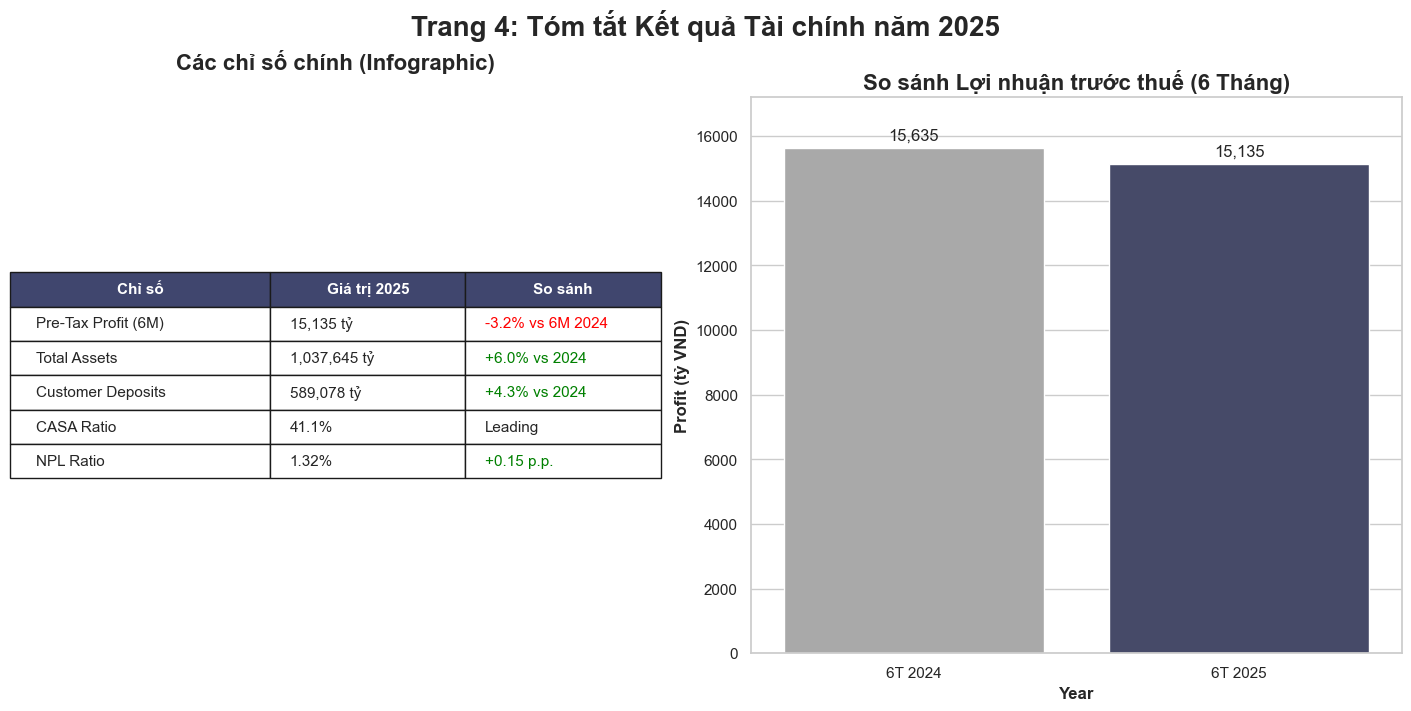

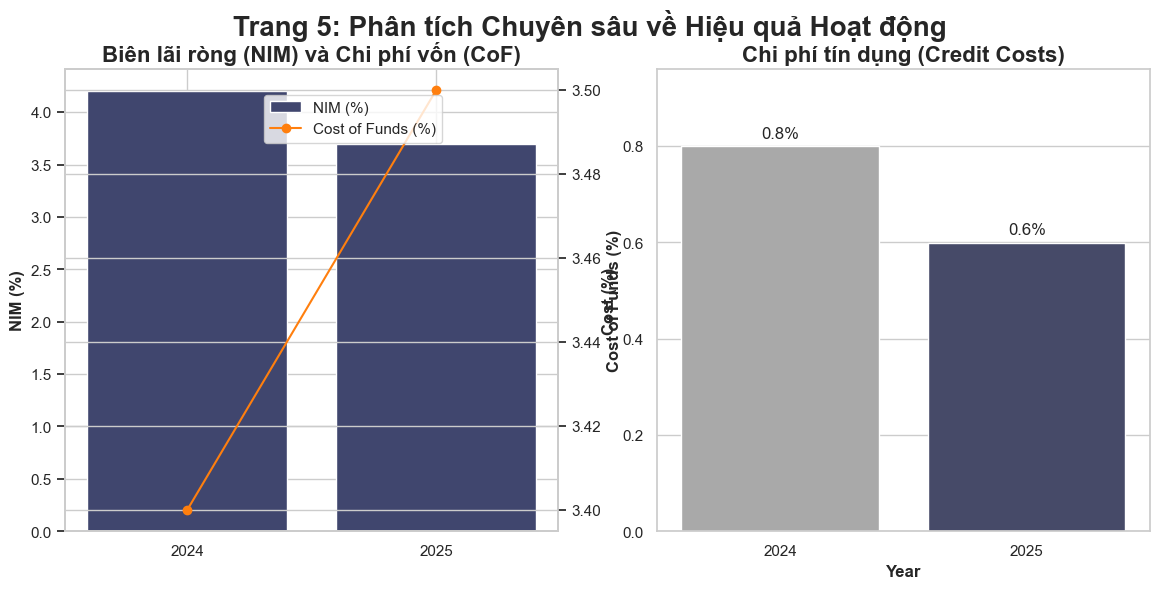

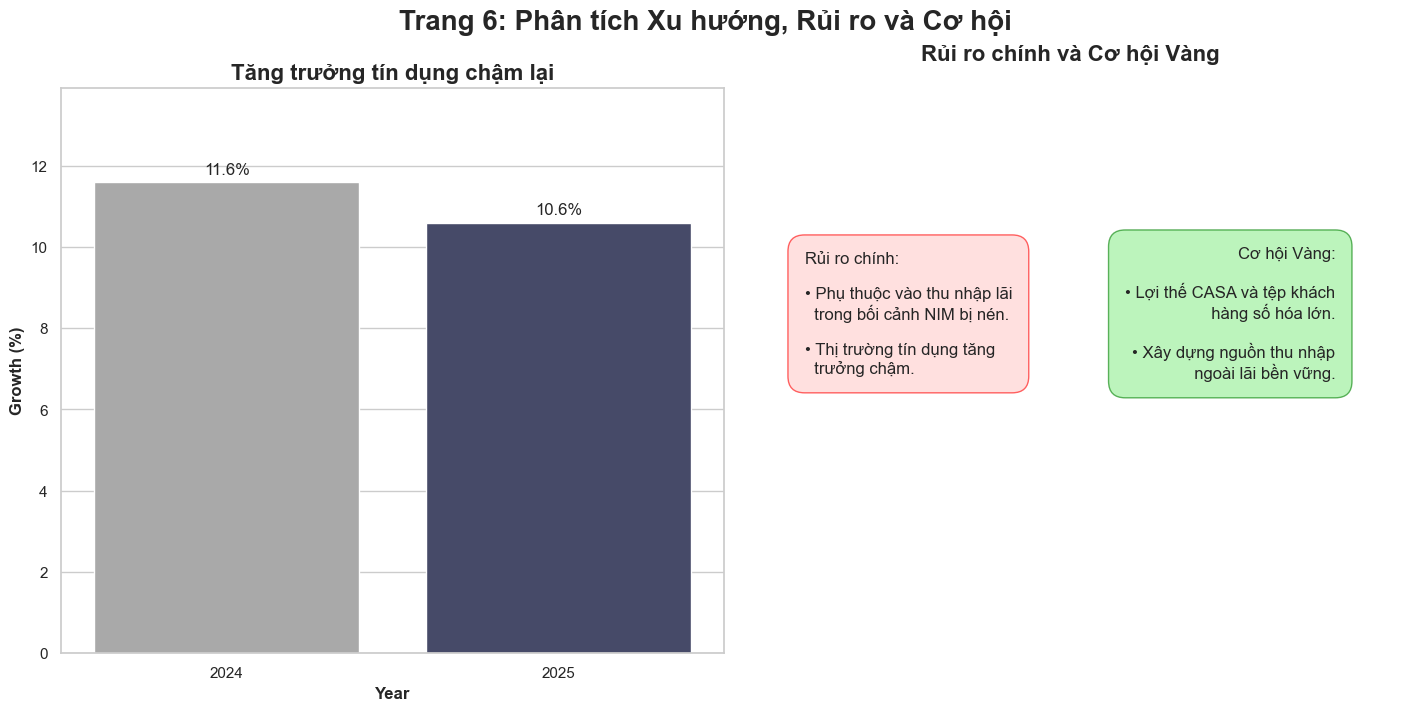

/Users/165lhyp/miniconda3/envs/battery_rul/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/165lhyp/miniconda3/envs/battery_rul/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128101 (\N{BUSTS IN SILHOUETTE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/165lhyp/miniconda3/envs/battery_rul/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128188 (\N{BRIEFCASE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


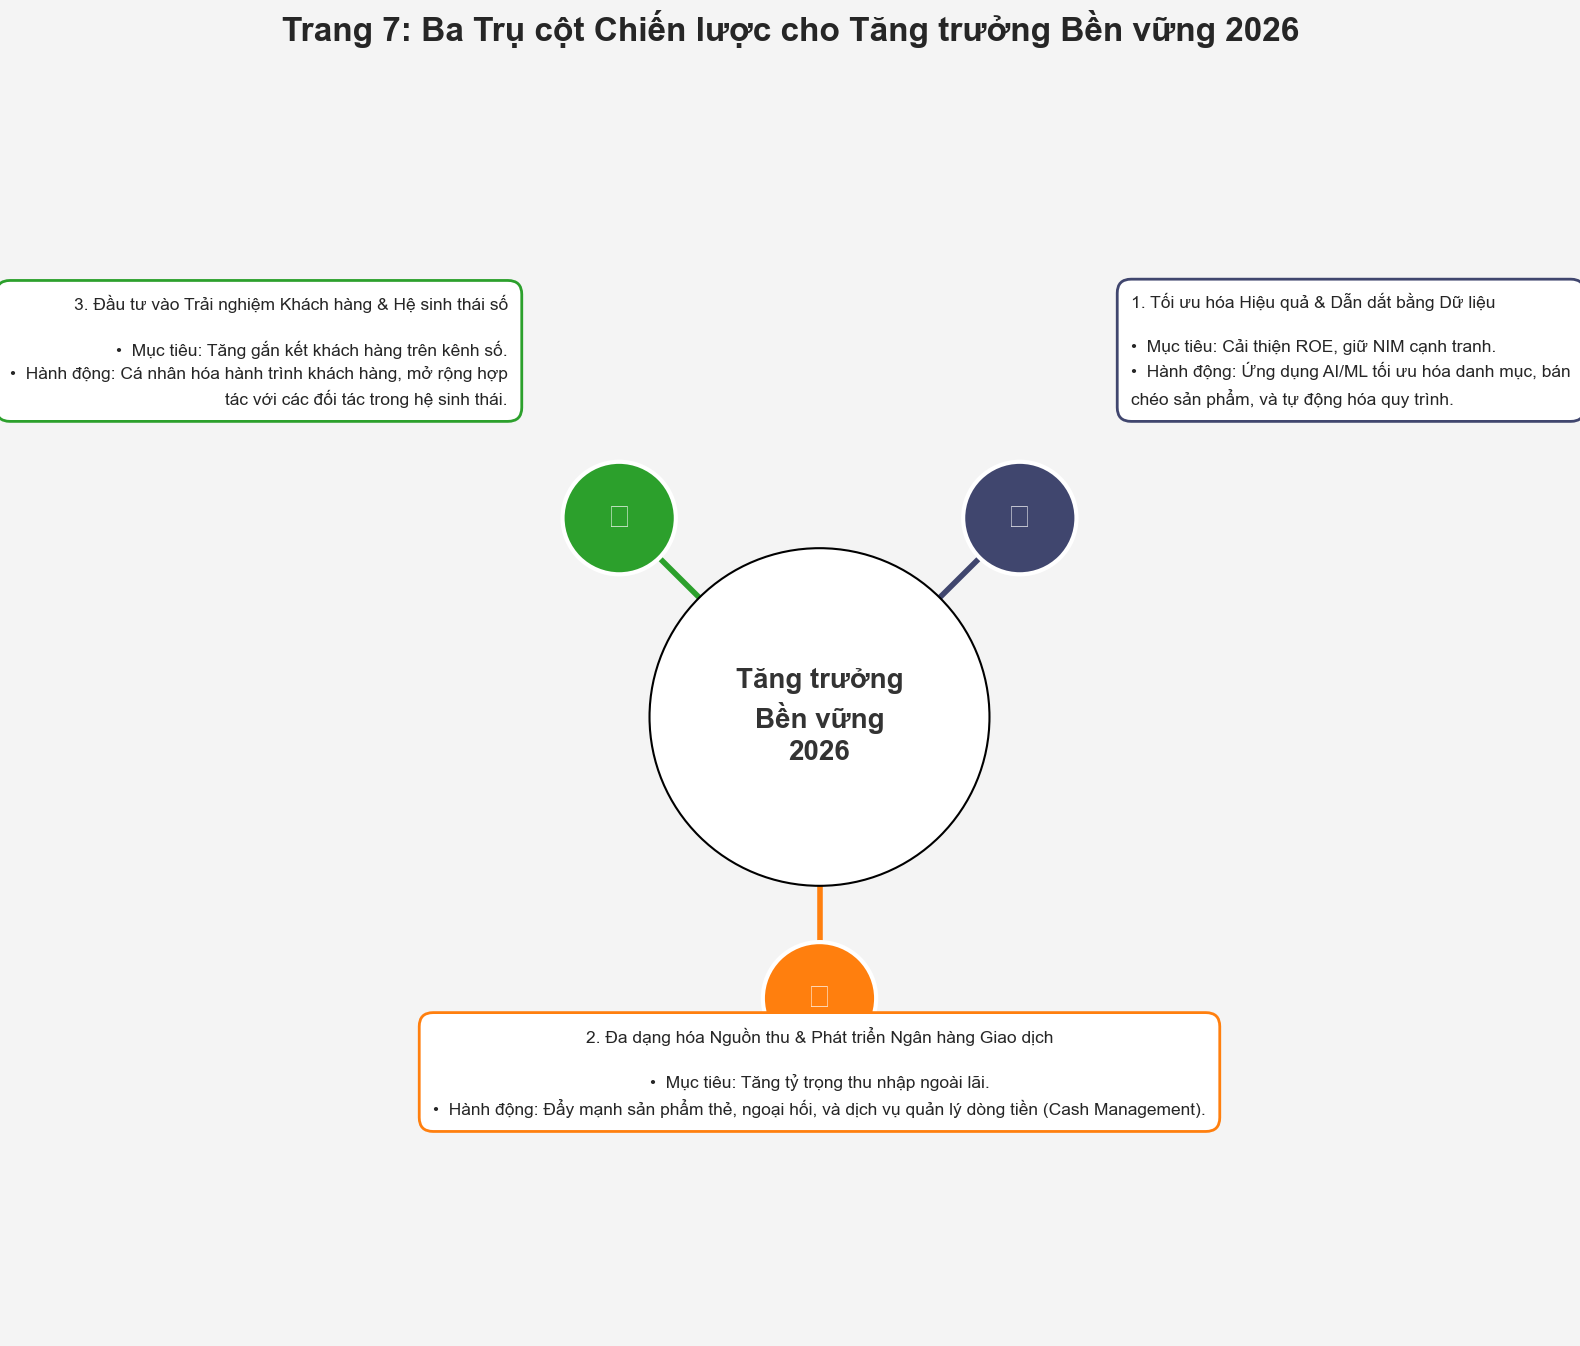

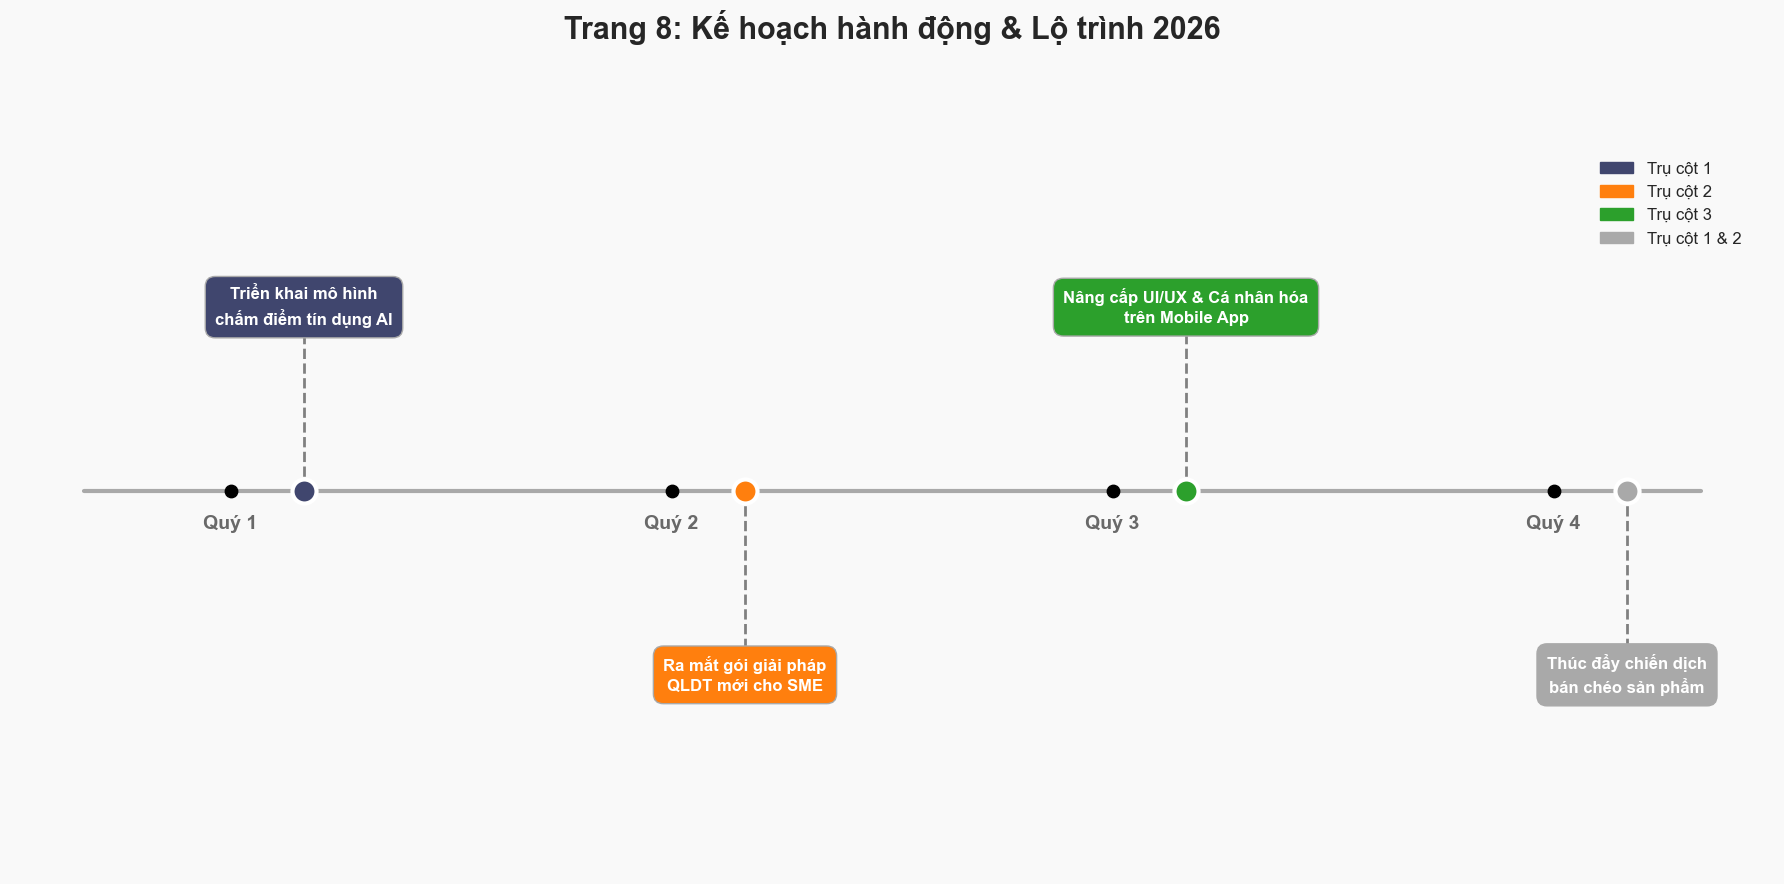

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Set a professional style for the plots
sns.set_theme(style="whitegrid")
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['figure.titleweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['figure.titlesize'] = 20

# --- Data Extraction from Report ---
# Data for Page 4
pbt_2025_6m = 15135
pbt_2024_6m = pbt_2025_6m / (1 - 0.032) # Calculate 2024 value from % change

financials_kpi = {
    'Metric': ['Pre-Tax Profit (6M)', 'Total Assets', 'Customer Deposits', 'CASA Ratio', 'NPL Ratio'],
    'Value': [f'{pbt_2025_6m:,.0f} tỷ', '1,037,645 tỷ', '589,078 tỷ', '41.1%', '1.32%'],
    'Change': ['-3.2% vs 6M 2024', '+6.0% vs 2024', '+4.3% vs 2024', 'Leading', '+0.15 p.p.']
}

# Data for Page 5
nim_2024 = 4.2
nim_2025 = 3.7
cost_of_funds_2024 = 3.4 # Assumed for visualization
cost_of_funds_2025 = 3.5
credit_costs_2024 = 0.8
credit_costs_2025 = 0.6

# Data for Page 6
credit_growth_2024 = 11.6
credit_growth_2025 = 10.6

# --- Visualization Functions ---

def visualize_page_4():
    """Generates visualizations for Page 4: Financial Summary."""
    fig = plt.figure(figsize=(14, 7), constrained_layout=True)
    fig.suptitle('Trang 4: Tóm tắt Kết quả Tài chính năm 2025')
    
    # KPI Table
    ax1 = fig.add_subplot(1, 2, 1)
    ax1.axis('off')
    ax1.set_title('Các chỉ số chính (Infographic)', pad=20)
    
    table_data = list(zip(financials_kpi['Metric'], financials_kpi['Value'], financials_kpi['Change']))
    table = ax1.table(cellText=table_data,
                      colLabels=['Chỉ số', 'Giá trị 2025', 'So sánh'],
                      cellLoc='left', loc='center',
                      colWidths=[0.4, 0.3, 0.3])
    table.auto_set_font_size(False)
    table.set_fontsize(11)
    table.scale(1, 2)
    
    for (row, col), cell in table.get_celld().items():
        if row == 0:
            cell.set_text_props(weight='bold', color='white')
            cell.set_facecolor('#40466e')
        else:
            cell.set_facecolor('white')
            if col == 2 and table_data[row-1][2].startswith('-'):
                 cell.get_text().set_color('red')
            elif col == 2 and table_data[row-1][2].startswith('+'):
                 cell.get_text().set_color('green')


    # Bar chart for Pre-Tax Profit
    ax2 = fig.add_subplot(1, 2, 2)
    pbt_data = {'Year': ['6T 2024', '6T 2025'], 'Profit (tỷ VND)': [pbt_2024_6m, pbt_2025_6m]}
    pbt_df = pd.DataFrame(pbt_data)
    
    sns.barplot(x='Year', y='Profit (tỷ VND)', data=pbt_df, ax=ax2, palette=['#a9a9a9', '#40466e'])
    ax2.set_title('So sánh Lợi nhuận trước thuế (6 Tháng)')
    for p in ax2.patches:
        ax2.annotate(f'{p.get_height():,.0f}', 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='center', 
                     xytext=(0, 9), 
                     textcoords='offset points')
    ax2.set_ylim(0, pbt_df['Profit (tỷ VND)'].max() * 1.1)


def visualize_page_5():
    """Generates visualizations for Page 5: Operational Performance."""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
    fig.suptitle('Trang 5: Phân tích Chuyên sâu về Hiệu quả Hoạt động')

    # Dual-axis chart for NIM and Cost of Funds
    years = ['2024', '2025']
    nim = [nim_2024, nim_2025]
    cof = [cost_of_funds_2024, cost_of_funds_2025]
    
    ax1.set_title('Biên lãi ròng (NIM) và Chi phí vốn (CoF)')
    ax1_twin = ax1.twinx()
    
    ax1.bar(years, nim, color='#40466e', label='NIM (%)')
    ax1_twin.plot(years, cof, color='#ff7f0e', marker='o', label='Cost of Funds (%)')
    
    ax1.set_ylabel('NIM (%)')
    ax1_twin.set_ylabel('Cost of Funds (%)')
    fig.legend(loc='upper right', bbox_to_anchor=(0.4, 0.85))

    # Bar chart for Credit Costs
    cc_data = {'Year': ['2024', '2025'], 'Cost (%)': [credit_costs_2024, credit_costs_2025]}
    cc_df = pd.DataFrame(cc_data)
    sns.barplot(x='Year', y='Cost (%)', data=cc_df, ax=ax2, palette=['#a9a9a9', '#40466e'])
    ax2.set_title('Chi phí tín dụng (Credit Costs)')
    for p in ax2.patches:
        ax2.annotate(f'{p.get_height()}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 9), textcoords='offset points')
    ax2.set_ylim(0, cc_df['Cost (%)'].max() * 1.2)


def visualize_page_6():
    """Generates visualizations for Page 6: Trends, Risks, and Opportunities."""
    fig = plt.figure(figsize=(14, 7), constrained_layout=True)
    fig.suptitle('Trang 6: Phân tích Xu hướng, Rủi ro và Cơ hội')

    # Credit Growth Bar Chart
    ax1 = fig.add_subplot(1, 2, 1)
    cg_data = {'Year': ['2024', '2025'], 'Growth (%)': [credit_growth_2024, credit_growth_2025]}
    cg_df = pd.DataFrame(cg_data)
    sns.barplot(x='Year', y='Growth (%)', data=cg_df, ax=ax1, palette=['#a9a9a9', '#40466e'])
    ax1.set_title('Tăng trưởng tín dụng chậm lại')
    for p in ax1.patches:
        ax1.annotate(f'{p.get_height()}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 9), textcoords='offset points')
    ax1.set_ylim(0, cg_df['Growth (%)'].max() * 1.2)

    # Risks vs Opportunities
    ax2 = fig.add_subplot(1, 2, 2)
    ax2.axis('off')
    ax2.set_title('Rủi ro chính và Cơ hội Vàng', pad=20)
    
    text_risks = "Rủi ro chính:\n\n• Phụ thuộc vào thu nhập lãi\n  trong bối cảnh NIM bị nén.\n\n• Thị trường tín dụng tăng\n  trưởng chậm."
    text_opps = "Cơ hội Vàng:\n\n• Lợi thế CASA và tệp khách\n  hàng số hóa lớn.\n\n• Xây dựng nguồn thu nhập\n  ngoài lãi bền vững."
    
    ax2.text(0.1, 0.6, text_risks, fontsize=12, va='center', ha='left', bbox=dict(boxstyle='round,pad=1', fc='#ffcccb', ec='red', alpha=0.6))
    ax2.text(0.9, 0.6, text_opps, fontsize=12, va='center', ha='right', bbox=dict(boxstyle='round,pad=1', fc='#90ee90', ec='green', alpha=0.6))


def visualize_page_7():
    """Generates a 'hub and spoke' circular infographic for Page 7 strategy."""
    fig, ax = plt.subplots(figsize=(16, 14))
    fig.suptitle('Trang 7: Ba Trụ cột Chiến lược cho Tăng trưởng Bền vững 2026', fontsize=24, weight='bold', y=0.96)

    # --- Base Setup ---
    ax.set_xlim(-2.2, 2.2)
    ax.set_ylim(-2.2, 2.2)
    ax.axis('off')
    fig.set_facecolor('#f4f4f4')

    # --- Central Goal ---
    ax.add_patch(plt.Circle((0, 0), 0.6, facecolor='white', edgecolor='black', lw=1.5, zorder=10))
    ax.text(0, 0, "Tăng trưởng\nBền vững\n2026",
            ha='center', va='center', fontsize=20, weight='bold', color='#333333', zorder=11, linespacing=1.3)

    # --- Pillar Data ---
    pillars = {
        "1. Tối ưu hóa Hiệu quả & Dẫn dắt bằng Dữ liệu": {
            "icon": "🧠",
            "content": "•  Mục tiêu: Cải thiện ROE, giữ NIM cạnh tranh.\n•  Hành động: Ứng dụng AI/ML tối ưu hóa danh mục, bán chéo sản phẩm, và tự động hóa quy trình.",
            "color": "#40466e",
            "angle_deg": 45,
            "text_pos": (1.1, 1.1)
        },
        "3. Đầu tư vào Trải nghiệm Khách hàng & Hệ sinh thái số": {
            "icon": "👥",
            "content": "•  Mục tiêu: Tăng gắn kết khách hàng trên kênh số.\n•  Hành động: Cá nhân hóa hành trình khách hàng, mở rộng hợp tác với các đối tác trong hệ sinh thái.",
            "color": "#2ca02c",
            "angle_deg": 135,
            "text_pos": (-1.1, 1.1)
        },
        "2. Đa dạng hóa Nguồn thu & Phát triển Ngân hàng Giao dịch": {
            "icon": "💼",
            "content": "•  Mục tiêu: Tăng tỷ trọng thu nhập ngoài lãi.\n•  Hành động: Đẩy mạnh sản phẩm thẻ, ngoại hối, và dịch vụ quản lý dòng tiền (Cash Management).",
            "color": "#ff7f0e",
            "angle_deg": -90,
            "text_pos": (0, -1.1)
        }
    }
    
    # --- Drawing Pillars ---
    for title, data in pillars.items():
        angle_rad = np.deg2rad(data['angle_deg'])
        
        # --- Position calculations
        start_point = (0.6 * np.cos(angle_rad), 0.6 * np.sin(angle_rad))
        end_point = (1.0 * np.cos(angle_rad), 1.0 * np.sin(angle_rad))
        
        # --- Connecting Line
        ax.plot([start_point[0], end_point[0]], [start_point[1], end_point[1]], color=data['color'], linewidth=4, zorder=1)

        # --- Endpoint Circle (Icon)
        ax.add_patch(plt.Circle(end_point, 0.2, facecolor=data['color'], zorder=3, ec='white', lw=3))
        ax.text(end_point[0], end_point[1], data['icon'], ha='center', va='center', fontsize=24, color='white', zorder=4)

        # --- Text Box
        ha = 'left' if data['text_pos'][0] > 0.1 else 'right' if data['text_pos'][0] < -0.1 else 'center'
        va = 'center' if abs(data['text_pos'][1]) < 0.1 else 'bottom' if data['text_pos'][1] > 0 else 'top'
        
        # Custom adjustments for better layout
        if data['angle_deg'] == -90:
            va = 'top'
        
        ax.text(data['text_pos'][0], data['text_pos'][1], f"{title}\n\n{data['content']}",
                ha=ha, va=va, fontsize=12.5, linespacing=1.5,
                bbox=dict(boxstyle='round,pad=0.8', fc='white', ec=data['color'], lw=2, alpha=1),
                wrap=True)

    plt.tight_layout(rect=[0, 0, 1, 0.95])


def visualize_page_8():
    """Generates an improved timeline/roadmap visualization for Page 8."""
    fig, ax = plt.subplots(figsize=(18, 9))
    fig.suptitle('Trang 8: Kế hoạch hành động & Lộ trình 2026', fontsize=22, weight='bold', y=0.98)

    # --- Configuration ---
    ax.set_ylim(-2.5, 2.5)
    ax.set_xlim(0, 12)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.set_facecolor("#f9f9f9")
    fig.set_facecolor("#f9f9f9")


    # --- Timeline Axis ---
    ax.plot([0.5, 11.5], [0, 0], color='darkgrey', linewidth=3, zorder=1)
    
    # Add quarter markers and labels
    quarter_markers = {
        'Quý 1': 1.5, 'Quý 2': 4.5, 'Quý 3': 7.5, 'Quý 4': 10.5
    }
    for label, marker in quarter_markers.items():
        ax.scatter(marker, 0, s=80, color='black', zorder=2)
        ax.text(marker, -0.25, label, ha='center', fontsize=14, weight='bold', color='dimgrey')

    # --- Roadmap Items ---
    tasks = {
        # Quý 1-2
        "Triển khai mô hình\nchấm điểm tín dụng AI": (2, 1.2, "P1"),
        "Ra mắt gói giải pháp\nQLDT mới cho SME": (5, -1.2, "P2"),
        # Quý 3-4
        "Nâng cấp UI/UX & Cá nhân hóa\ntrên Mobile App": (8, 1.2, "P3"),
        "Thúc đẩy chiến dịch\nbán chéo sản phẩm": (11, -1.2, "P1 & P2")
    }

    pillar_colors = {"P1": "#40466e", "P2": "#ff7f0e", "P3": "#2ca02c", "P1 & P2": "#a9a9a9"}

    for task, (pos, level, pillar) in tasks.items():
        # Stem
        ax.plot([pos, pos], [0, level * 0.9], color='grey', linestyle='--', linewidth=2)
        
        # Marker
        ax.scatter(pos, 0, s=300, color=pillar_colors[pillar], zorder=3, ec='white', lw=3)
        
        # Text box
        ax.text(pos, level, task, ha='center', va=('center'), 
                fontsize=12,
                bbox=dict(boxstyle='round,pad=0.6', fc=pillar_colors[pillar], ec='darkgrey', alpha=1),
                color='white', weight='bold', linespacing=1.4)
    
    # --- Legend ---
    legend_patches = [plt.Rectangle((0,0),1,1, color=color) for color in pillar_colors.values()]
    legend_labels = ["Trụ cột 1", "Trụ cột 2", "Trụ cột 3", "Trụ cột 1 & 2"]
    ax.legend(legend_patches, legend_labels, loc='upper right', fontsize=12, frameon=False, bbox_to_anchor=(0.99, 0.95))
    
    plt.tight_layout(rect=[0, 0, 1, 0.95])


# --- Main Execution ---
if __name__ == '__main__':
    visualize_page_4()
    visualize_page_5()
    visualize_page_6()
    visualize_page_7()
    visualize_page_8()

    plt.show()
